In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load dataset
df = pd.read_csv("/content/traffic.csv")

In [6]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [7]:
# Ensure Time column is properly formatted
df['Time'] = df['Time'].astype(str).str.zfill(8)  # Ensures HH:MM:SS format

In [8]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [9]:
# Assign a reference year and month
start_year = 1970  # Assume a recent year
start_month = 1  # Start from January

In [10]:
date_list = []
current_month = start_month
current_year = start_year
previous_day = None

In [11]:
for day in df['Date']:
    if previous_day is not None and day < previous_day:
        # If the day decreases, assume a new month
        current_month += 1
        if current_month > 12:
            current_month = 1
            current_year += 1
    date_list.append(f"{current_year}-{current_month:02d}-{day:02d}")
    previous_day = day


In [12]:
# Convert the reconstructed Date column to datetime
df['Date'] = pd.to_datetime(date_list, errors='coerce')

In [13]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,1970-01-10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,1970-01-10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,1970-01-10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,1970-01-10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,1970-01-10,Tuesday,57,6,15,16,94,normal


In [14]:
# Merge Date and Time columns and convert to datetime format
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'], errors='coerce')

<ipython-input-14-227996e60992>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'], errors='coerce')


In [15]:
# Drop any rows with NaT values due to parsing issues
df = df.dropna(subset=['DateTime'])

In [16]:
# Sort by DateTime
df = df.sort_values(by='DateTime')

In [17]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,DateTime
0,12:00:00 AM,1970-01-10,Tuesday,31,0,4,4,39,low,1970-01-10 00:00:00
1,12:15:00 AM,1970-01-10,Tuesday,49,0,3,3,55,low,1970-01-10 00:15:00
2,12:30:00 AM,1970-01-10,Tuesday,46,0,3,6,55,low,1970-01-10 00:30:00
3,12:45:00 AM,1970-01-10,Tuesday,51,0,2,5,58,low,1970-01-10 00:45:00
4,1:00:00 AM,1970-01-10,Tuesday,57,6,15,16,94,normal,1970-01-10 01:00:00


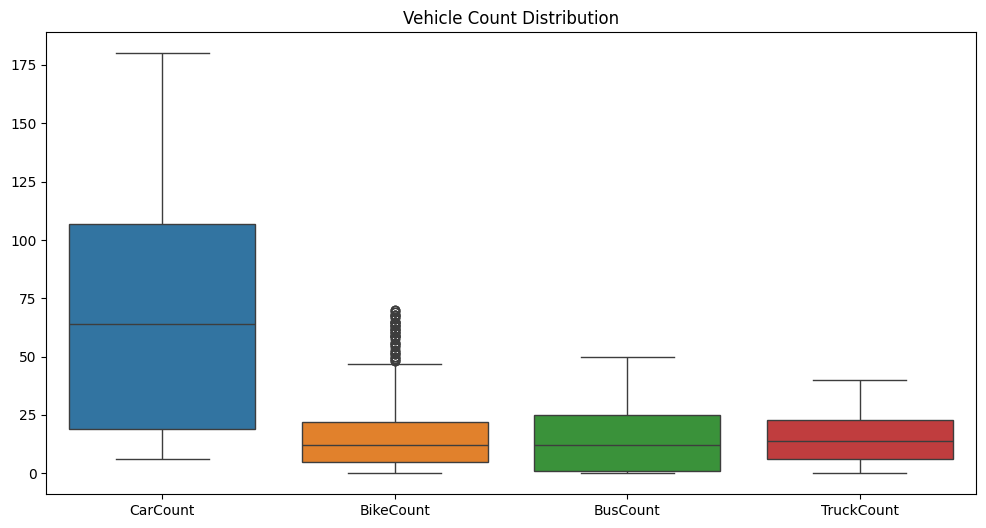

In [18]:
# 1. Vehicle Distribution Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']])
plt.title("Vehicle Count Distribution")
plt.show()

<Figure size 1200x600 with 0 Axes>

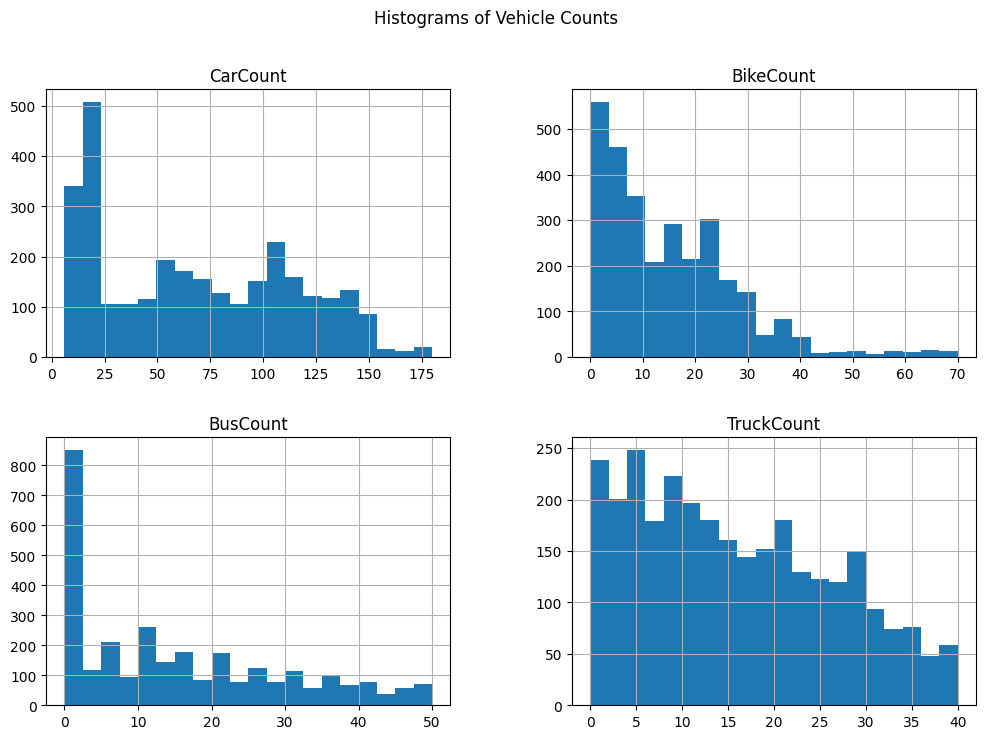

In [19]:
plt.figure(figsize=(12, 6))
df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Vehicle Counts")
plt.show()

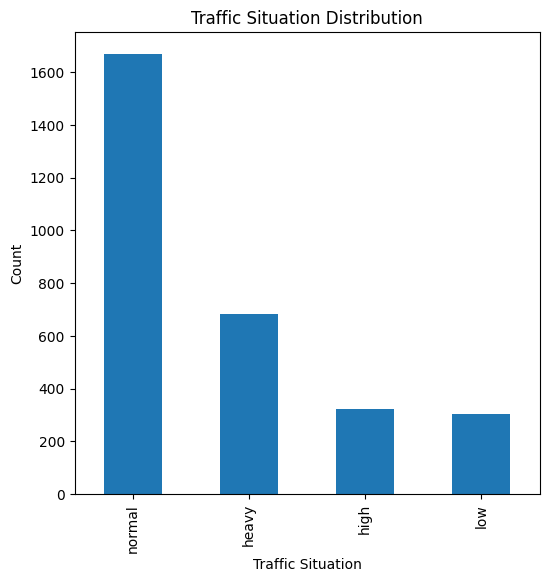

In [20]:
# 2. Traffic Situation Distribution
plt.figure(figsize=(6, 6))
df['Traffic Situation'].value_counts().plot(kind='bar')
plt.title("Traffic Situation Distribution")
plt.xlabel("Traffic Situation")
plt.ylabel("Count")
plt.show()

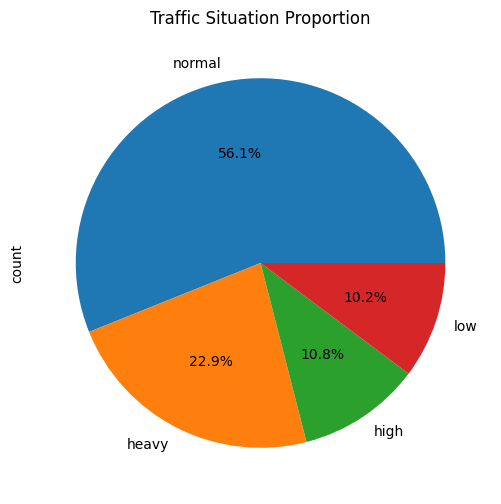

In [21]:
plt.figure(figsize=(6, 6))
df['Traffic Situation'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Traffic Situation Proportion")
plt.show()

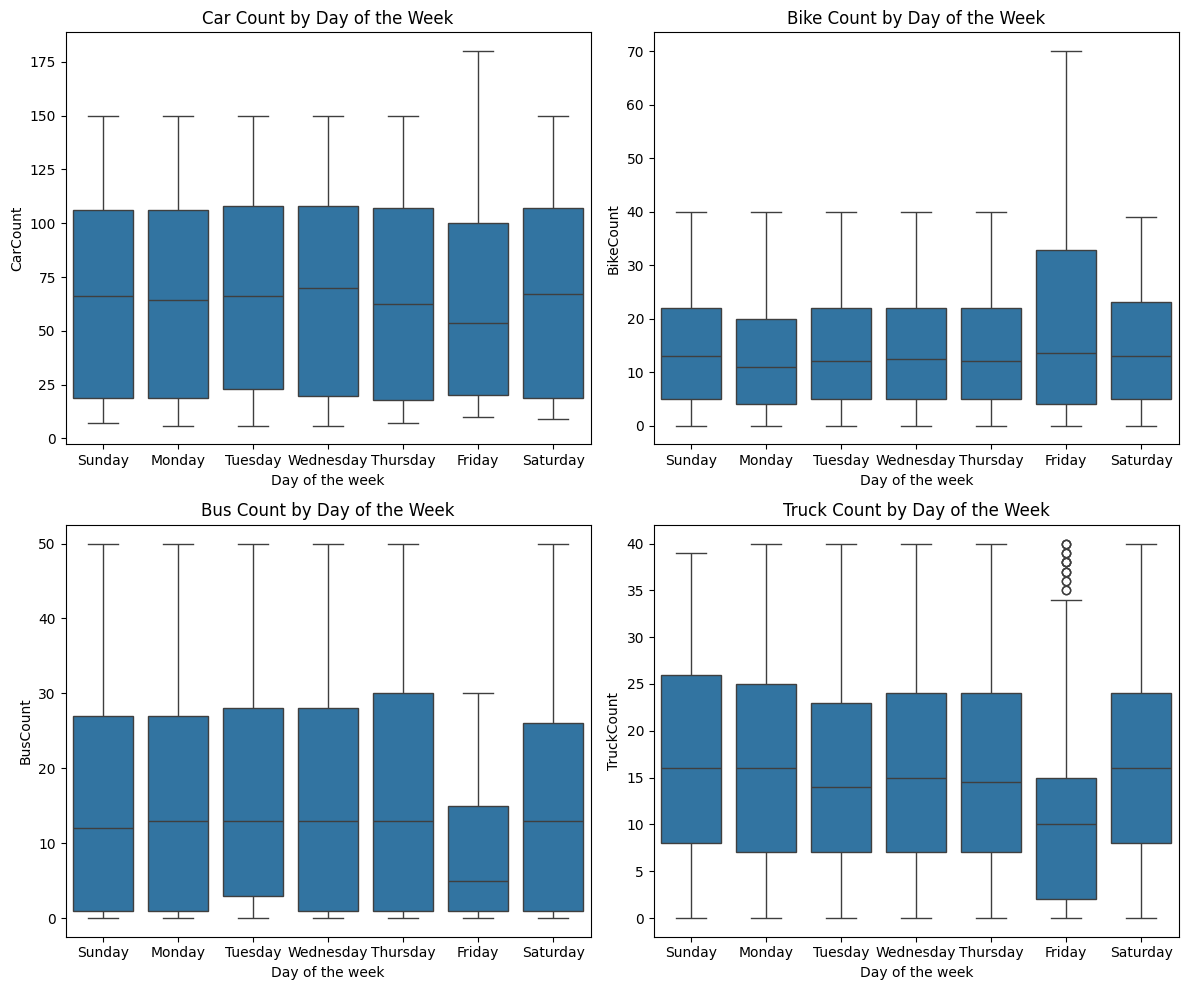

In [27]:
# 3. Variation by Day of the Week
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x='Day of the week', y='CarCount', data=df, order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], ax=axes[0, 0])
axes[0, 0].set_title("Car Count by Day of the Week")

sns.boxplot(x='Day of the week', y='BikeCount', data=df, order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], ax=axes[0, 1])
axes[0, 1].set_title("Bike Count by Day of the Week")

sns.boxplot(x='Day of the week', y='BusCount', data=df, order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], ax=axes[1, 0])
axes[1, 0].set_title("Bus Count by Day of the Week")

sns.boxplot(x='Day of the week', y='TruckCount', data=df, order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], ax=axes[1, 1])
axes[1, 1].set_title("Truck Count by Day of the Week")

plt.tight_layout()
plt.show()

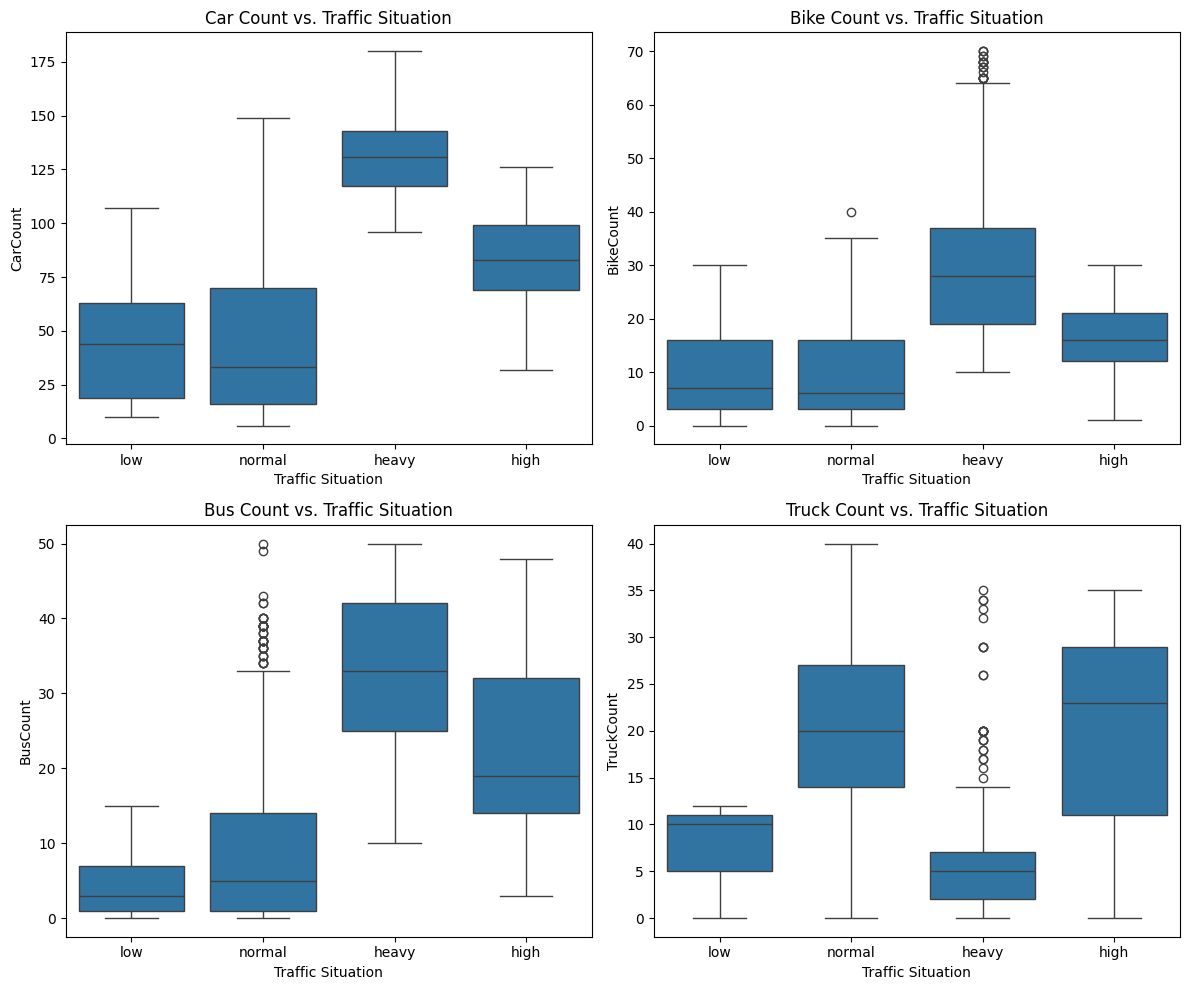

In [23]:
# 4-7. Vehicle Count vs. Traffic Situation
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x='Traffic Situation', y='CarCount', data=df, ax=axes[0, 0])
axes[0, 0].set_title("Car Count vs. Traffic Situation")

sns.boxplot(x='Traffic Situation', y='BikeCount', data=df, ax=axes[0, 1])
axes[0, 1].set_title("Bike Count vs. Traffic Situation")

sns.boxplot(x='Traffic Situation', y='BusCount', data=df, ax=axes[1, 0])
axes[1, 0].set_title("Bus Count vs. Traffic Situation")

sns.boxplot(x='Traffic Situation', y='TruckCount', data=df, ax=axes[1, 1])
axes[1, 1].set_title("Truck Count vs. Traffic Situation")

plt.tight_layout()
plt.show()

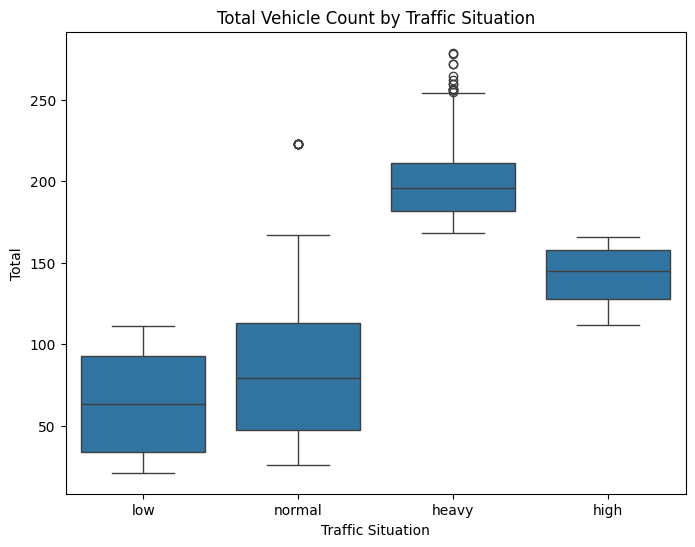

In [24]:
# 8. Total Vehicle Count vs. Traffic Situation
plt.figure(figsize=(8, 6))
sns.boxplot(x='Traffic Situation', y='Total', data=df)
plt.title("Total Vehicle Count by Traffic Situation")
plt.show()

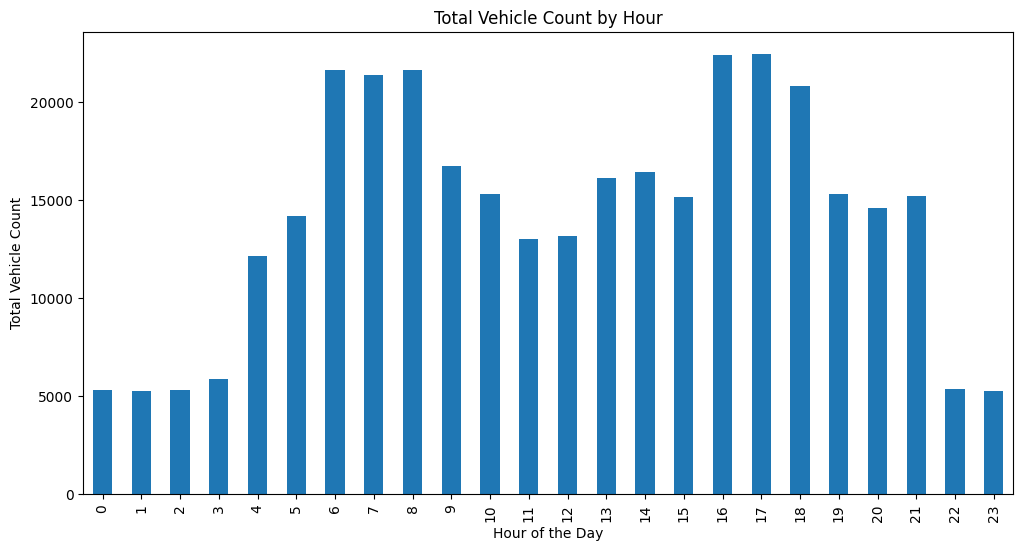

In [25]:
# 9. Busiest Hours of the Day
df['Hour'] = df['DateTime'].dt.hour
hourly_counts = df.groupby('Hour')['Total'].sum()
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar')
plt.title("Total Vehicle Count by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Vehicle Count")
plt.show()